# Homework #1
## In this homework we are going to get familiar with basics of NetworkX and Gephi for analysing and visualizing networks.

## Task 1
### NetworkX is a Python library for the analysis of networks. With NetworkX we can create, import, manipulate graphs. Additionally, we can calculate some basic properties of these graphs with its built-in functions. Unfortunately, NetworkX is not very powerful for visualizing large graphs which we are going to work with most of the time. For this reason, we are going to use a software called Gephi. In this homework, we are going to do some basic analysis on some famous graphs and then store the results in a format readable by Gephi. We then use Gephi to have a meaningful visualization of these results.  

### Gephi can be downloaded from the following web page:
### https://gephi.org/users/download

### The basics of NetworkX library and Gephi:
### Some useful links to get familiar with NetworkX:
### https://vimeo.com/124354692
### https://www.cl.cam.ac.uk/~cm542/teaching/2010/stna-pdfs/stna-lecture8.pdf
### Some useful links to get familiar with Gephi:
### https://gephi.org/users/tutorial-visualization/
### https://www.youtube.com/watch?v=FLiv3xnEepw

### Run the following cell to import the libraries that we are going to use in this homework. While in our tasks almost all these libraries are pre-installed in the Jupyter Notebook instance, from time to time you might need a library that is not already installed. In this case you can use the terminal to install the library simply by using 'pip install ...' command or run terminal commands directly from your Notebook by placing an '!' before it, e.g., '!pip install ...'. 

In [1]:
%%time
#import useful packages, all of them are important but not necessarily used in this code
#enable inline plotting in Python Notebook
#supress warnings

%pylab inline
import networkx as nx
import numpy as np
import matplotlib
import scipy
import warnings
warnings.filterwarnings('ignore')
import time
import os
import gzip
import cugraph as cnx

Populating the interactive namespace from numpy and matplotlib
CPU times: user 2.75 s, sys: 4.18 s, total: 6.93 s
Wall time: 2.27 s


### 0: Run the following cell to unzip and store the Facebook dateset in a .txt file which is readable by NetworkX:

In [2]:
%%time
import urllib.request

# First, create a directory, preferably outside the submission folder because large files may result in submission errors.
import os, errno
try:
    os.makedirs("../data")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
try:
    os.makedirs("../data/facebook")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
        
urllib.request.urlretrieve("https://snap.stanford.edu/data/facebook_combined.txt.gz","../data/facebook/facebook_combined.txt.gz")

CPU times: user 15.8 ms, sys: 3.97 ms, total: 19.8 ms
Wall time: 148 ms


('../data/facebook/facebook_combined.txt.gz',
 <http.client.HTTPMessage at 0x7f96ce0a8490>)

In [3]:
%%time
# The following code simply converts the data file from ZIP to TXT so that NetworkX can read it

import gzip
# datapath = "../../../datasets/ece227-fa19-public/"
inF = gzip.GzipFile("../data/facebook/facebook_combined.txt.gz", 'rb')
s = inF.read()
inF.close()

outF = open("../data/facebook/facebook_combined.txt", 'wb')
outF.write(s)
outF.close()

CPU times: user 9.31 ms, sys: 4.65 ms, total: 14 ms
Wall time: 18.3 ms


In [4]:
%%time
#load the network after converting into text file

file_name = "../data/facebook/facebook_combined.txt"
#convert the information in the text file into a graph, find no. of edges & nodes in the graph

g1=nx.read_edgelist(file_name,create_using=nx.Graph(),nodetype=int)
node, edge=g1.order(),g1.size()
print(nx.info(g1))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910
CPU times: user 217 ms, sys: 22.5 ms, total: 239 ms
Wall time: 238 ms


### 1: Write a code that plots the degree distribution of the above graph. Make sure you do not confuse degree distribution with degree sequence. Use both linear and logarithmic (log-log) scale plots.

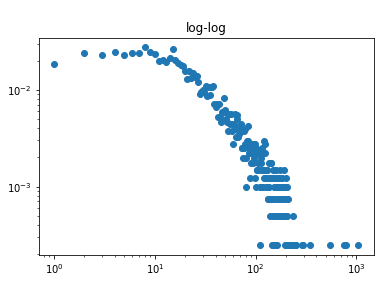

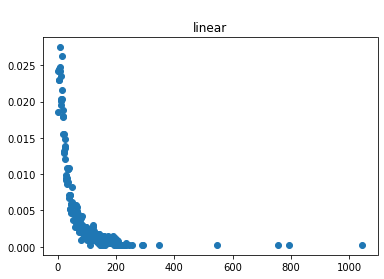

In [5]:
import collections
import matplotlib.pyplot as plt

degree_sequence = sorted([d for n, d in g1.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

nodes = g1.number_of_nodes()
cnt = list(cnt)

for i in range(len(cnt)):
    cnt[i] = cnt[i]/nodes

figure1 = plt.figure()
ax1 = figure1.add_subplot()
ax1.set_title('\nlog-log')
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.loglog(deg, cnt, 'o')

figure2 = plt.figure()
ax2 = figure2.add_subplot()
ax2.set_title('\nlinear')
ax2.plot(deg, cnt, 'o')

### 2: Write a code that calculates and prints the network diameter and the average shortest path without directly invoking the NetworkX built-in function (you can use other NetworkX functions) and then use this function to compare the result with yours (a slight difference is expected and normal when you do this).

In [6]:
ecc = nx.eccentricity(g1)
print("my diameter: ", max(ecc.values()))

lengths = 0.0
for node in g1:
    paths = nx.single_source_shortest_path_length(g1, node)
    for i in paths.values():
        lengths += i
    
SPlength = lengths/(g1.number_of_nodes()*(g1.number_of_nodes() - 1))
print("my average shortest path: ", SPlength)

print("networkx diameter: ", nx.diameter(g1))
print("networkx average shortest path: ", nx.average_shortest_path_length(g1))

my diameter:  8
my average shortest path:  3.6925068496963913
networkx diameter:  8
networkx average shortest path:  3.6925068496963913


### 3: Write a code to *estimate* the clustering coefficient of the nodes of the graph and plot it without directly invoking the NetworkX built-in function (you can use other NetworkX functions) and then use this function to compare the result with yours. What is the average clustering coefficient?

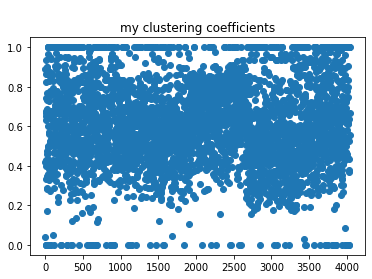

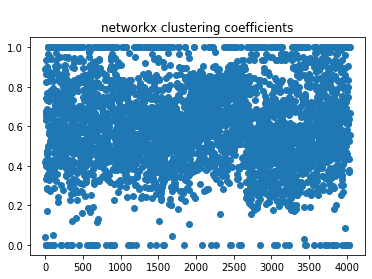

In [26]:
result = []
nodes = []
for i in g1:
    ctriangle = 0
    List = []
    for j in g1:
        if i != j:
            if g1.has_edge(i, j):
                for k in g1:
                    if i != k and j != k and not k in List:
                        if g1.has_edge(i, k) and g1.has_edge(j, k):
                            ctriangle += 1
        List.append(j)
    if len(g1[i]) != 0 and len(g1[i]) != 1:
        result.append(2*ctriangle/(len(g1[i]) * (len(g1[i])-1)))
    else:
        result.append(0)
    nodes.append(i)

figure1 = plt.figure()
ax1 = figure1.add_subplot()
ax1.set_title('\nmy clustering coefficients')
ax1.plot(nodes, result, 'o')

figure2 = plt.figure()
ax2 = figure2.add_subplot()
lists = sorted(nx.clustering(g1).items())
node, clusc = zip(*lists)
ax2.set_title('\nnetworkx clustering coefficients')
ax2.plot(node, clusc, 'o')

### 4: Write a code to calculate the degree centrality of the nodes of the graph and plot it without directly invoking the NetworkX built-in function (you can use other NetworkX functions) and then use this function to compare the result with yours.

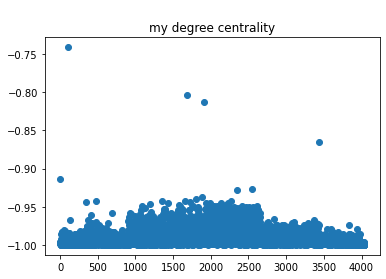

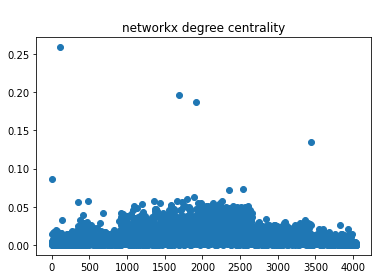

In [8]:
result = []
nodes = []
for i in g1:
    result.append(g1.degree(i)/g1.number_of_nodes()-1)
    nodes.append(i)
    
figure1 = plt.figure()
ax1 = figure1.add_subplot()
ax1.set_title('\nmy degree centrality')
ax1.plot(nodes, result, 'o')

figure2 = plt.figure()
ax2 = figure2.add_subplot()
lists = sorted(nx.degree_centrality(g1).items())
node, dec = zip(*lists)
ax2.set_title('\nnetworkx degree centrality')
ax2.plot(node, dec, 'o')

### 5: Write a code to calculate the betweenness centrality of the nodes of the graph and plot it. Optional: Now repeat this task without directly invoking the NetworkX built-in function (you can use other NetworkX functions).

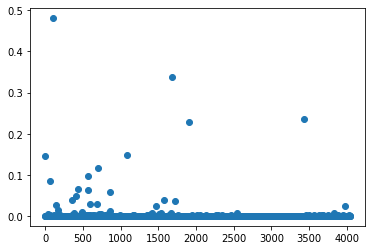

In [9]:
lists = sorted(cnx.betweenness_centrality(g1).items())
node,betc = zip(*lists)
plt.plot(node, betc, 'o')

### 6: Write a code to calculate the eigenvector centrality of the nodes of the graph and plot it. Optional: Now repeat this task without directly invoking the NetworkX built-in function (you can use other NetworkX functions). 

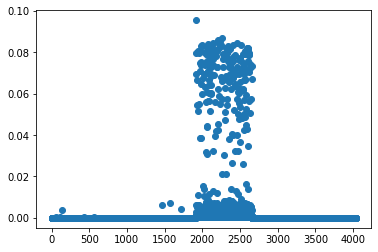

In [10]:
lists = sorted(nx.eigenvector_centrality(g1).items())
node,eigc = zip(*lists)
plt.plot(node, eigc, 'o')

### 7: Write a code to store the graph in a file that is readable by Gephi (Hint: Use NetworkX 'write_gml' method.) Make sure to add the betweenness centrality and degree of each node as an attribute of each node to be stored in this file for the next task.

In [11]:
bb = cnx.betweenness_centrality(g1)
degree = nx.degree(g1)

node, bb1 = zip(*sorted(bb.items()))
nodes, deg = zip(*sorted(dict(degree).items()))

DICT = {}
for node1, bb11, deg1 in zip (node, bb1, deg):
    DICT[node1] = {}
    DICT[node1]["betweenness"] = bb11
    DICT[node1]["deg"] = deg1

# print(DICT)
nx.set_node_attributes(g1, DICT)
nx.write_gml(g1, "facebook.gml")

### Repeat the above parts for the following three networks and make sure that your functions consistently and correctly works for these other networks: 
### Enron Email Network (https://snap.stanford.edu/data/email-Enron.txt.gz)
### 'citNet'- Citation Network (http://snap.stanford.edu/data/cit-HepTh.txt.gz)
### Erdos Collaboration Network (https://files.oakland.edu/users/grossman/enp/Erdos1.html). 


### Note1: Some of these networks are large and their analysis will take time.

### Note2 (Optional): "ece227" Kernel has 'cuGraph' library available. This library has some of NetworkX functions implemented to work on GPU. If your notebook has GPU access you can use this library.  

### Note3 (Optional): To achieve higher performance many of the tasks can be done in parallel on multiple cores of the CPU as well. You can also write some of your codes using the 'multiprocessing' library.

## Enron Email Network Analysis

Name: 
Type: Graph
Number of nodes: 36692
Number of edges: 183831
Average degree:  10.0202
networkx diameter:  13
networkx average shortest path:  4.025163988178407


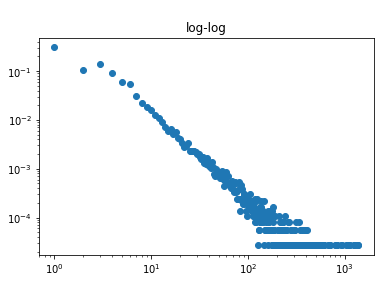

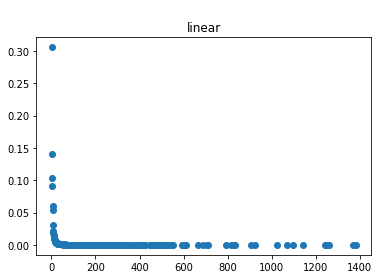

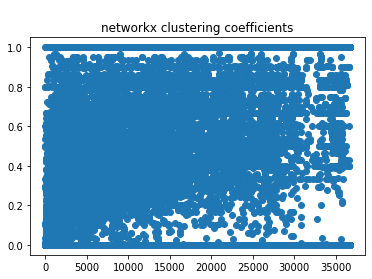

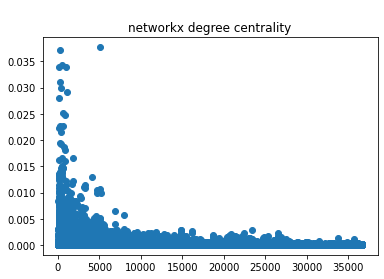

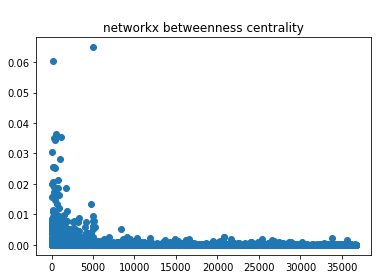

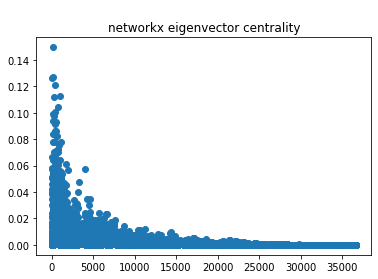

In [21]:
try:
    os.makedirs("../data/enron")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
        
urllib.request.urlretrieve("https://snap.stanford.edu/data/email-Enron.txt.gz","../data/enron/enron_combined.txt.gz")

inF = gzip.GzipFile("../data/enron/enron_combined.txt.gz", 'rb')
s = inF.read()
inF.close()

outF = open("../data/enron/enron_combined.txt", 'wb')
outF.write(s)
outF.close()

file_name = "../data/enron/enron_combined.txt"
#convert the information in the text file into a graph, find no. of edges & nodes in the graph

g2=nx.read_edgelist(file_name,create_using=nx.Graph(),nodetype=int)
node, edge=g2.order(),g2.size()
print(nx.info(g2))


##DEGREE DISTRIBUTION
degree_sequence = sorted([d for n, d in g2.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

nodes_num = g2.number_of_nodes()
cnt = list(cnt)

for i in range(len(cnt)):
    cnt[i] = cnt[i]/nodes_num

figure1 = plt.figure()
ax1 = figure1.add_subplot()
ax1.set_title('\nlog-log')
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.loglog(deg, cnt, 'o')

figure2 = plt.figure()
ax2 = figure2.add_subplot()
ax2.set_title('\nlinear')
ax2.plot(deg, cnt, 'o')

##DIAMETER & AVERAGE SHORTEST PATH
largest = g2.subgraph(max(nx.connected_components(g2), key=len)).copy()
print("networkx diameter: ", nx.diameter(largest))
print("networkx average shortest path: ", nx.average_shortest_path_length(largest))

##CLUSTERING COEFFICIENTS
figure3 = plt.figure()
ax3 = figure3.add_subplot()
ax3.set_title('\nnetworkx clustering coefficients')
lists = sorted(nx.clustering(g2).items())
node, deg = zip(*lists)
ax3.plot(node, deg, 'o')

##DEGREE CENTRALITY
figure4 = plt.figure()
ax4 = figure4.add_subplot()
ax4.set_title('\nnetworkx degree centrality')
lists = sorted(nx.degree_centrality(g2).items())
node, deg = zip(*lists)
ax4.plot(node, deg, 'o')

##BETWEENNESS CENTRALITY
figure5 = plt.figure()
ax5 = figure5.add_subplot()
ax5.set_title('\nnetworkx betweenness centrality')
lists = sorted(cnx.betweenness_centrality(g2).items())
node, deg = zip(*lists)
ax5.plot(node, deg, 'o')

##EIGENVECTOR CENTRALITY
figure6 = plt.figure()
ax6 = figure6.add_subplot()
ax6.set_title('\nnetworkx eigenvector centrality')
lists = sorted(nx.eigenvector_centrality(g2).items())
node, deg = zip(*lists)
ax6.plot(node, deg, 'o')

bb = cnx.betweenness_centrality(g2)
degree = nx.degree(g2)

node, bb1 = zip(*sorted(bb.items()))
nodes, deg = zip(*sorted(dict(degree).items()))

DICT = {}
for node1, bb11, deg1 in zip (node, bb1, deg):
    DICT[node1] = {}
    DICT[node1]["betweenness"] = bb11
    DICT[node1]["deg"] = deg1

# print(DICT)
nx.set_node_attributes(g2, DICT)
nx.write_gml(g2, "enron.gml")

## 'citNet'- Citation Network analysis

Name: 
Type: Graph
Number of nodes: 27770
Number of edges: 352324
Average degree:  25.3744
networkx diameter:  15
networkx average shortest path:  4.278680083960654


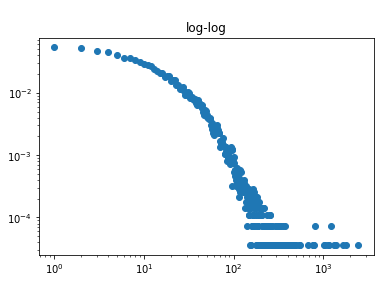

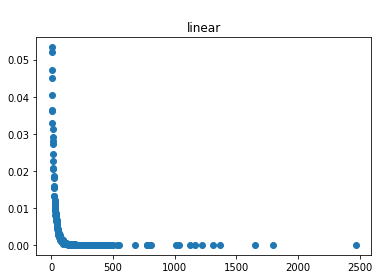

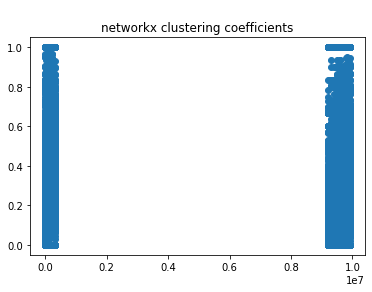

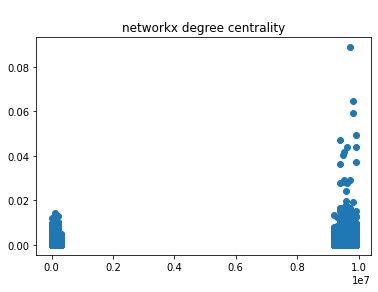

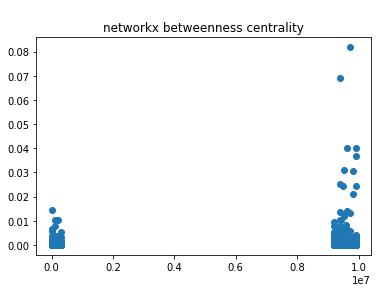

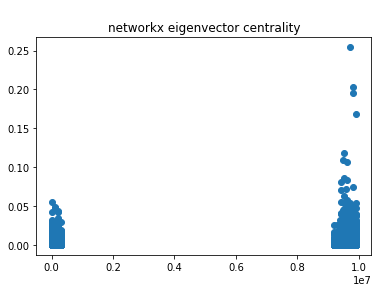

In [22]:
try:
    os.makedirs("../data/citNet")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
        
urllib.request.urlretrieve("http://snap.stanford.edu/data/cit-HepTh.txt.gz","../data/citNet/citNet_combined.txt.gz")

inF = gzip.GzipFile("../data/citNet/citNet_combined.txt.gz", 'rb')
s = inF.read()
inF.close()

outF = open("../data/citNet/citNet_combined.txt", 'wb')
outF.write(s)
outF.close()

file_name = "../data/citNet/citNet_combined.txt"
#convert the information in the text file into a graph, find no. of edges & nodes in the graph

g3=nx.read_edgelist(file_name,create_using=nx.Graph(),nodetype=int)
node, edge=g3.order(),g3.size()
print(nx.info(g3))


##DEGREE DISTRIBUTION
degree_sequence = sorted([d for n, d in g3.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

nodes_num = g3.number_of_nodes()
cnt = list(cnt)

for i in range(len(cnt)):
    cnt[i] = cnt[i]/nodes_num

figure1 = plt.figure()
ax1 = figure1.add_subplot()
ax1.set_title('\nlog-log')
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.loglog(deg, cnt, 'o')

figure2 = plt.figure()
ax2 = figure2.add_subplot()
ax2.set_title('\nlinear')
ax2.plot(deg, cnt, 'o')

##DIAMETER & AVERAGE SHORTEST PATH
largest = g3.subgraph(max(nx.connected_components(g3), key=len)).copy()
print("networkx diameter: ", nx.diameter(largest))
print("networkx average shortest path: ", nx.average_shortest_path_length(largest))

##CLUSTERING COEFFICIENTS
figure3 = plt.figure()
ax3 = figure3.add_subplot()
ax3.set_title('\nnetworkx clustering coefficients')
lists = sorted(nx.clustering(g3).items())
node, deg = zip(*lists)
ax3.plot(node, deg, 'o')

##DEGREE CENTRALITY
figure4 = plt.figure()
ax4 = figure4.add_subplot()
ax4.set_title('\nnetworkx degree centrality')
lists = sorted(nx.degree_centrality(g3).items())
node, deg = zip(*lists)
ax4.plot(node, deg, 'o')

##BETWEENNESS CENTRALITY
figure5 = plt.figure()
ax5 = figure5.add_subplot()
ax5.set_title('\nnetworkx betweenness centrality')
lists = sorted(cnx.betweenness_centrality(g3).items())
node, deg = zip(*lists)
ax5.plot(node, deg, 'o')

##EIGENVECTOR CENTRALITY
figure6 = plt.figure()
ax6 = figure6.add_subplot()
ax6.set_title('\nnetworkx eigenvector centrality')
lists = sorted(nx.eigenvector_centrality(g3).items())
node, deg = zip(*lists)
ax6.plot(node, deg, 'o')

bb = cnx.betweenness_centrality(g3)
degree = nx.degree(g3)

node, bb1 = zip(*sorted(bb.items()))
nodes, deg = zip(*sorted(dict(degree).items()))

DICT = {}
for node1, bb11, deg1 in zip (node, bb1, deg):
    DICT[node1] = {}
    DICT[node1]["betweenness"] = bb11
    DICT[node1]["deg"] = deg1

# print(DICT)
nx.set_node_attributes(g3, DICT)
nx.write_gml(g3, "citNet.gml")

## Erdos Network- Collaboration Network analysis

### Since Erdos Citation Network is captured from a different source we are providing the code necessary to extract the network from this webpage. In real-life projects it is likely that you need to go through similar processes to build a network. 
### 0:

In [23]:
import urllib
import os,errno
try:
    os.makedirs("data/erdos")
except OSError as e:
    if e.errno != errno.EEXIST:
        raise
        
# IF THE FOLLOWING FAILS DOWNLOAD THE PAGE MANUALLY...

urllib.request.urlretrieve("https://files.oakland.edu/users/grossman/enp/Erdos1.html", "data/erdos/Erdos1.html") 

URLError: <urlopen error [SSL: CERTIFICATE_VERIFY_FAILED] certificate verify failed: unable to get local issuer certificate (_ssl.c:1125)>

In [24]:
g4 = nx.Graph()
dict_authors = {}
dict_authors['Paul Erdos'] = 0
g4.add_node(0)
g4.nodes[0]['author'] = 'Paul Erdos'

# add the authors with Erdos number 1 and 2 from file
line_count = 1
skip_line = 24
skip_space = 1

is_new = False
author = ""
coauthor = ""
index = 1
ind_author = 1
ind_coauthor = 1

def parseLine(l, start):
    end = start
    while end < len(l) - 1 and not (l[end] == ' ' and l[end + 1] == ' '):
        end += 1
    return l[start:end]

def addAuthor(auth, ind):
    if auth in dict_authors:
        return ind
    dict_authors[auth] = ind
    return ind + 1

for l in open("data/erdos/Erdos1.html"):    
    if line_count >= skip_line:
        if l == '\n':
            is_new = True
        elif is_new:
            author = parseLine(l, 0)
            index = addAuthor(author, index)
            ind_author = dict_authors[author]
            g4.add_edge(0, ind_author)
            g4.nodes[ind_author]['author'] = author
            is_new = False
        elif l == '</pre>':
            break
        else:
            coauthor = parseLine(l, skip_space)
            index = addAuthor(coauthor, index)
            ind_coauthor = dict_authors[coauthor]
            g4.add_edge(ind_author, ind_coauthor)
            g4.nodes[ind_coauthor]['author'] = coauthor
    line_count += 1

print(nx.info(g4))

Name: 
Type: Graph
Number of nodes: 11524
Number of edges: 18504
Average degree:   3.2114


networkx diameter:  4
networkx average shortest path:  3.821987433309889


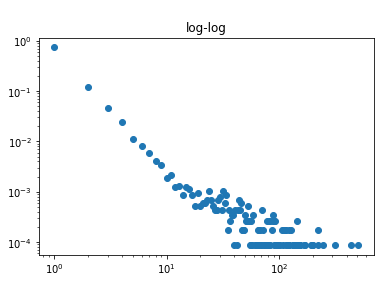

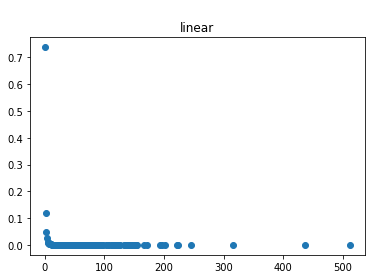

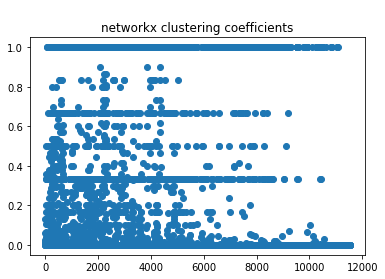

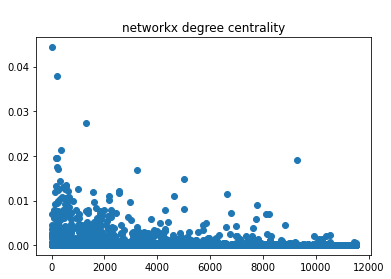

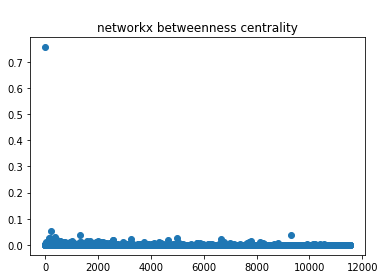

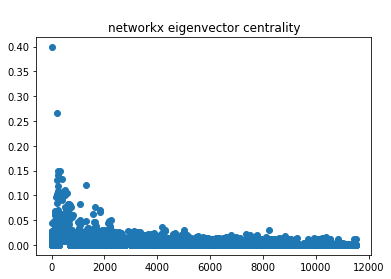

In [25]:
##DEGREE DISTRIBUTION
degree_sequence = sorted([d for n, d in g4.degree()], reverse=True)  # degree sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

nodes = g4.number_of_nodes()
cnt = list(cnt)

for i in range(len(cnt)):
    cnt[i] = cnt[i]/nodes

figure1 = plt.figure()
ax1 = figure1.add_subplot()
ax1.set_title('\nlog-log')
ax1.set_xscale("log")
ax1.set_yscale("log")
ax1.loglog(deg, cnt, 'o')

figure2 = plt.figure()
ax2 = figure2.add_subplot()
ax2.set_title('\nlinear')
ax2.plot(deg, cnt, 'o')

##DIAMETER & AVERAGE SHORTEST PATH
print("networkx diameter: ", nx.diameter(g4))
print("networkx average shortest path: ", nx.average_shortest_path_length(g4))

##CLUSTERING COEFFICIENTS
figure3 = plt.figure()
ax3 = figure3.add_subplot()
ax3.set_title('\nnetworkx clustering coefficients')
lists = sorted(nx.clustering(g4).items())
node, deg = zip(*lists)
ax3.plot(node, deg, 'o')

##DEGREE CENTRALITY
figure4 = plt.figure()
ax4 = figure4.add_subplot()
ax4.set_title('\nnetworkx degree centrality')
lists = sorted(nx.degree_centrality(g4).items())
node, deg = zip(*lists)
ax4.plot(node, deg, 'o')

##BETWEENNESS CENTRALITY
figure5 = plt.figure()
ax5 = figure5.add_subplot()
ax5.set_title('\nnetworkx betweenness centrality')
lists = sorted(cnx.betweenness_centrality(g4).items())
node, deg = zip(*lists)
ax5.plot(node, deg, 'o')

##EIGENVECTOR CENTRALITY
figure6 = plt.figure()
ax6 = figure6.add_subplot()
ax6.set_title('\nnetworkx eigenvector centrality')
lists = sorted(nx.eigenvector_centrality(g4).items())
node, deg = zip(*lists)
ax6.plot(node, deg, 'o')

bb = cnx.betweenness_centrality(g4)
degree = nx.degree(g4)

node, bb1 = zip(*sorted(bb.items()))
nodes, deg = zip(*sorted(dict(degree).items()))

DICT = {}
for node1, bb11, deg1 in zip (node, bb1, deg):
    DICT[node1] = {}
    DICT[node1]["betweenness"] = bb11
    DICT[node1]["deg"] = deg1

# print(DICT)
nx.set_node_attributes(g4, DICT)
nx.write_gml(g4, "erdols.gml")

## Task 2
### In this task we will use Gephi to visualize the networks that we analyzed above. In the previous task, we saved the graph in the 'graphml' format such that each node has its degree and its betweenness centrality as its attribute. In this task, we are going to use these attributes to have a better visualization of the graph. Follow these steps to obtain a nice and meaningful visualization of the graphs:

### Open Gephi-->> Open the '.gml' file of a network -->> Change 'Layout' of the graph to Force Atlas 2, etc. to have a better visualisation -->> In the 'Appearance' window there are multiple options to change the appearance of the nodes/ edges of the graph according to various network properties like degree, clustering coefficient, modularity class, etc.-->> Set the node sizes according to Degree distribution. -->> Save the image file and include it in the following cell for each of the above networks.

### Respond to the following questions for the Facebook and Enron-email networks.
#### 1) Visualize the network in Gephi using a suitable layout, with the node size as well as the node label / Id proportional to the degree distribution of each node. Use 3 different colors to differentiate nodes with high, moderate and low degree distributions.
#### 2) Repeat (1) with the node size as well as the node label / Id size proportional to the betweenness centrality.
#### 3) Analyze all the graphs and explain which of the nodes are the most important ones as far as the network structure is concerned. Explain the reason.

(-0.5, 1023.5, 1023.5, -0.5)

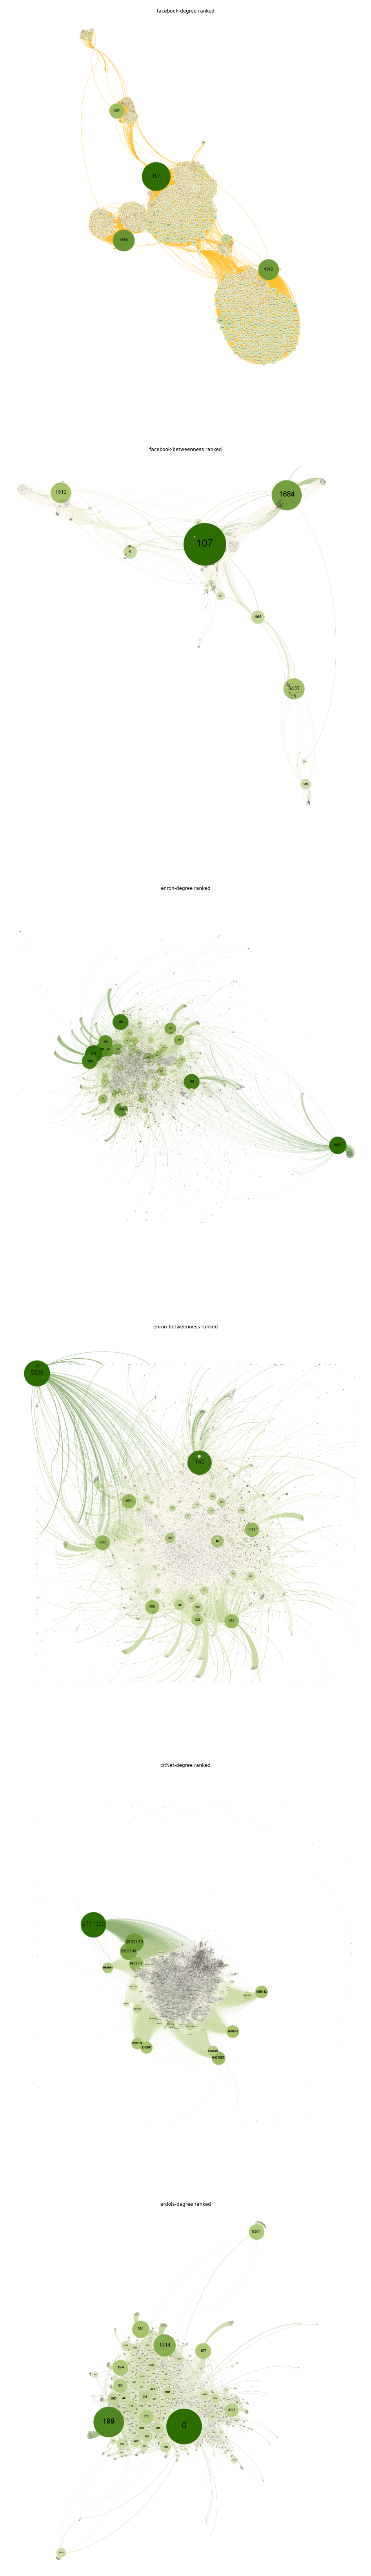

In [55]:
import cv2

plt.figure(figsize=(120, 120))

img1 = cv2.imread('facebook.png') 
plt.subplot(6,1,1)
plt.title('\nfacebook-degree ranked')
plt.imshow(img1)
plt.axis('off')

img2 = cv2.imread('facebook1.png')
plt.subplot(6,1,2)
plt.title('\nfacebook-betweenness ranked')
plt.imshow(img2)
plt.axis('off')

##############################################################################################################################################
#In facebook graph, node 107, 1912, 1684, and 3437 own more significance, as they have both largest degrees and betweenness, which means they
#have large impact on the connectivity and utilization. According to the lecture, they are more "connected" and "used more often".
##############################################################################################################################################

img3 = cv2.imread('enron.png')
plt.subplot(6,1,3)
plt.title('\nenron-degree ranked')
plt.imshow(img3)
plt.axis('off')

img4 = cv2.imread('enron1.png')
plt.subplot(6,1,4)
plt.title('\nenron-betweenness ranked')
plt.imshow(img4)
plt.axis('off')

##############################################################################################################################################
#In enron graph, node 140 and 5038 own more significance, as they have both largest degrees and betweenness, which means they
#have large impact on the connectivity and utilization. According to the lecture, they are more "connected" and "used more often".
##############################################################################################################################################

img5 = cv2.imread('citNet.png')
plt.subplot(6,1,5)
plt.title('\ncitNet-degree ranked')
plt.imshow(img5)
plt.axis('off')

##############################################################################################################################################
#In citNet graph, by simply considering the degree, node 9711200, 9802109 and 9802150 own more significance.
##############################################################################################################################################

img6 = cv2.imread('erdols.png')
plt.subplot(6,1,6)
plt.title('\nerdols-degree ranked')
plt.imshow(img6)
plt.axis('off')

##############################################################################################################################################
#In erdols graph, by simply considering the degree, node 0, 199 and 1314 own more significance.
##############################################################################################################################################
